# Quantifications

In [1]:
import rpy2

%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
%%R
df20 <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(genus,species) %>% filter(!(chr=='chrX')) %>% filter(freq_mean > 0.5) %>% mutate(recomb_bin = ntile(cm_per_mb, 20))  %>% filter(!(species %in% c('zaza','albinasus')))
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')
merge_pg_name <- left_join(df20,pg_namedf, by = c('genus'='genus'))
merge_pg_name$pg_name <- as_factor(merge_pg_name$pg_name)
nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_MEDIAN')
nes <- nes %>% 
    group_by(genus,species) %>%
    reframe(
        NE_MEAN = mean(NE_MEAN),
        NE_MEDIAN = mean(NE_MEDIAN))
df <- left_join(merge_pg_name,nes, by = c('genus'='genus','species'='species'))

Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): genus, pg_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specifi

In [4]:
%%R
head(merge_pg_name)

# A tibble: 6 × 18
# Groups:   genus, species [1]
  chr     start     end freq_mean freq_min freq_max freq_median window_size_mean
  <chr>   <dbl>   <dbl>     <dbl>    <dbl>    <dbl>       <dbl>            <dbl>
1 chr1  1800001 1900000     0.677    0.677    0.677       0.677            99999
2 chr1  1900001 2000000     0.571    0.571    0.571       0.571            99999
3 chr1  2100001 2200000     0.671    0.671    0.671       0.671            99999
4 chr1  2200001 2300000     0.727    0.727    0.727       0.727            99999
5 chr1  2400001 2500000     0.748    0.748    0.748       0.748            99999
6 chr1  2500001 2600000     0.755    0.755    0.755       0.755            99999
# ℹ 10 more variables: sum_n_mean <dbl>, species <chr>, genus <chr>,
#   cm_start <dbl>, cm_end <dbl>, cm_per_mb <dbl>, N_VARIANTS <dbl>, PI <dbl>,
#   recomb_bin <int>, pg_name <fct>


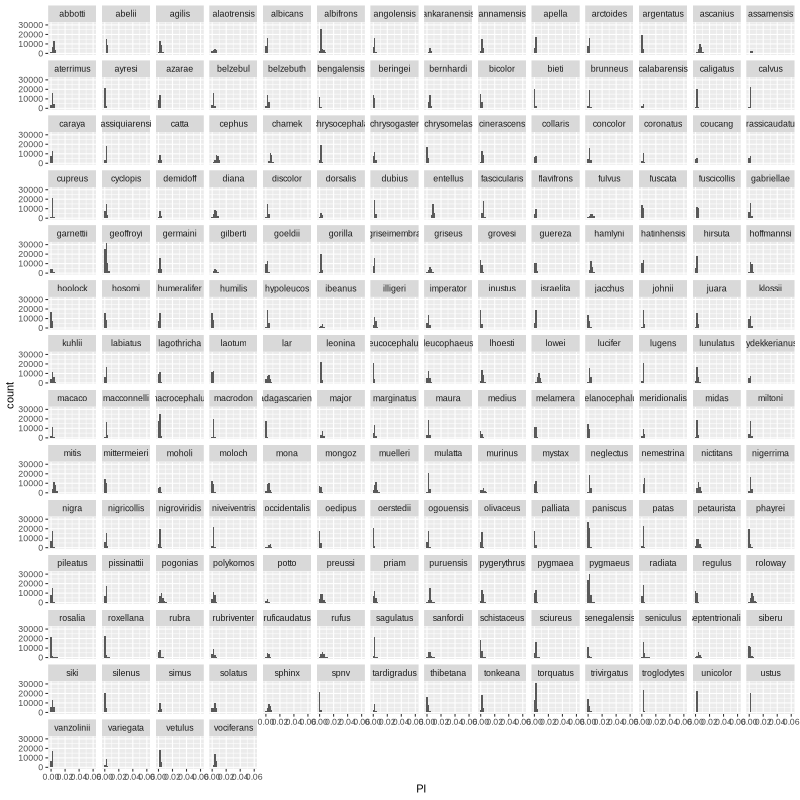

In [13]:
%%R -w 800 -h 800
df %>% group_by(genus, species) %>% 
    ggplot(aes(x=PI, group_by=species)) + 
    geom_histogram(bins=30) + 
    facet_wrap(~species) 

In [15]:
%%R
windows_and_snps <- merge_pg_name %>% 
    group_by(genus,species) %>%
    reframe(
        total_variants = sum(N_VARIANTS),
        total_windows = n(),
        median_pi = median(PI),
        mean_pi = mean(PI),
        variance_pi = var(PI)
    )

In [16]:
%%R
windows_and_snps

# A tibble: 192 × 7
   genus      species total_variants total_windows median_pi mean_pi variance_pi
   <chr>      <chr>            <dbl>         <int>     <dbl>   <dbl>       <dbl>
 1 Allenopit… nigrov…        7804794         25028   0.00156 0.00172  0.00000110
 2 Allochroc… lhoesti       13334959         25110   0.00280 0.00294  0.00000215
 3 Allochroc… preussi        7651873         25063   0.00303 0.00305  0.00000421
 4 Allochroc… solatus        8793179         24347   0.00372 0.00361  0.00000566
 5 Alouatta   belzeb…        4582210         22125   0.00184 0.00207  0.00000254
 6 Alouatta   caraya         6203590         21783   0.00127 0.00152  0.00000208
 7 Alouatta   discol…       10549240         22256   0.00230 0.00258  0.00000264
 8 Alouatta   juara         10284680         22301   0.00235 0.00253  0.00000223
 9 Alouatta   maccon…       15275886         22265   0.00231 0.00242  0.00000157
10 Alouatta   nigerr…        9520336         22218   0.00231 0.00239  0.00000165
# ℹ 182 

In [17]:
%%R
windows_and_snps %>%
    reframe(
        median = median(total_windows),
        max = max(total_windows),
        min = min(total_windows),
    sum = sum(total_windows))

# A tibble: 1 × 4
  median   max   min     sum
   <dbl> <int> <int>   <int>
1 23552. 49453  4861 4188996


In [18]:
%%R
windows_and_snps %>%
    reframe(
        median = median(total_variants),
        max = max(total_variants),
        min = min(total_variants),
    sum = sum(total_variants))

# A tibble: 1 × 4
   median      max    min        sum
    <dbl>    <dbl>  <dbl>      <dbl>
1 5725887 88390840 738670 1729320065


In [19]:
%%R
windows_and_snps %>% filter(total_variants %in% c(max(total_variants),min(total_variants)))

# A tibble: 2 × 7
  genus  species      total_variants total_windows median_pi mean_pi variance_pi
  <chr>  <chr>                 <dbl>         <int>     <dbl>   <dbl>       <dbl>
1 Ateles chamek             88390840         23145   0.00693 6.83e-3 0.00000290 
2 Galago senegalensis         738670         12760   0.00037 5.79e-4 0.000000292


In [20]:
%%R
windows_and_snps %>% filter(total_windows %in% c(max(total_windows),min(total_windows)))

# A tibble: 2 × 7
  genus  species    total_variants total_windows median_pi mean_pi variance_pi
  <chr>  <chr>               <dbl>         <int>     <dbl>   <dbl>       <dbl>
1 Macaca assamensis        1438418          4861   0.00301 0.00296  0.00000149
2 Pongo  pygmaeus         18741594         49453   0.00192 0.00206  0.00000221


In [21]:
%%R
windows_and_snps %>% 
    filter(median_pi %in% c(max(median_pi),min(median_pi)))

# A tibble: 2 × 7
  genus       species total_variants total_windows median_pi mean_pi variance_pi
  <chr>       <chr>            <dbl>         <int>     <dbl>   <dbl>       <dbl>
1 Alouatta    pallia…        1165969         20703   0.00016 5.63e-4  0.00000190
2 Semnopithe… entell…       85217932         24763   0.00856 8.65e-3  0.00000180


In [12]:
%%R
windows_and_snps %>% filter(mean_pi %in% c(max(mean_pi),min(mean_pi)))

# A tibble: 2 × 7
  genus       species total_variants total_windows median_pi mean_pi variance_pi
  <chr>       <chr>            <dbl>         <int>     <dbl>   <dbl>       <dbl>
1 Mico        spnv            996856         23787   0.00019 4.19e-4 0.000000671
2 Semnopithe… entell…       85217932         24763   0.00856 8.65e-3 0.00000180 


In [13]:
%%R
windows_and_snps %>% filter(variance_pi %in% c(max(variance_pi),min(variance_pi)))

# A tibble: 2 × 7
  genus       species total_variants total_windows median_pi mean_pi variance_pi
  <chr>       <chr>            <dbl>         <int>     <dbl>   <dbl>       <dbl>
1 Daubentonia madaga…         863144         18756   0.0004  4.60e-4 0.000000191
2 Eulemur     albifr…        6106522         14417   0.00411 4.24e-3 0.00000716 


In [14]:
%%R
nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_MEDIAN')
nes <- nes %>% 
    group_by(genus,species) %>%
    reframe(
        NE_MEAN = mean(NE_MEAN),
        NE_MEDIAN = mean(NE_MEDIAN))

New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
%%R
nes %>% filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(NE_MEDIAN %in% c(max(NE_MEDIAN),min(NE_MEDIAN)))

# A tibble: 2 × 4
  genus         species NE_MEAN NE_MEDIAN
  <chr>         <chr>     <dbl>     <dbl>
1 Cercopithecus cephus  274690.   245939.
2 Rhinopithecus bieti    10261.     9517.
